# 1. Mounting drive on Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 2. Importing libraries

In [0]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import GridSearchCV

# 3. Loading JSON files

In [0]:
with open('/content/drive/My Drive/ultimate_data_challenge.json','r') as f:
  data = json.load(f)

In [5]:
df = pd.DataFrame(data)
print (df.shape)
df.head()

(50000, 12)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [6]:
with open('/content/drive/My Drive/logins.json','r') as f:
  logins = json.load(f)
print (logins['login_time'][:5])

['1970-01-01 20:13:18', '1970-01-01 20:16:10', '1970-01-01 20:16:37', '1970-01-01 20:16:36', '1970-01-01 20:26:21']


# 4. Exploratory Data Analysis - exploring *logins* dataset

In [7]:
print (logins.keys())

dict_keys(['login_time'])


In [8]:
len(logins['login_time'])

93142

In [9]:
df_logins = pd.Series(logins['login_time'])
df_logins = df_logins.apply(pd.to_datetime)
df_logins.head()

0   1970-01-01 20:13:18
1   1970-01-01 20:16:10
2   1970-01-01 20:16:37
3   1970-01-01 20:16:36
4   1970-01-01 20:26:21
dtype: datetime64[ns]

Looks like the dataset only contains one key *login_time* that consists of 93142 instances of date and time objects.

In [10]:
df_logins.index = df_logins
df_logins.head()

1970-01-01 20:13:18   1970-01-01 20:13:18
1970-01-01 20:16:10   1970-01-01 20:16:10
1970-01-01 20:16:37   1970-01-01 20:16:37
1970-01-01 20:16:36   1970-01-01 20:16:36
1970-01-01 20:26:21   1970-01-01 20:26:21
dtype: datetime64[ns]

### a. Exploring logins per day

In [11]:
#Resampling datetime data by day
counts_per_day = df_logins.resample('D').count()
print ("Number of days in the dataset: ",counts_per_day.shape[0])

Number of days in the dataset:  103


In [12]:
counts_per_day.head(20)

1970-01-01     112
1970-01-02     681
1970-01-03     793
1970-01-04     788
1970-01-05     459
1970-01-06     536
1970-01-07     648
1970-01-08     625
1970-01-09     881
1970-01-10    1054
1970-01-11    1014
1970-01-12     536
1970-01-13     492
1970-01-14     547
1970-01-15     624
1970-01-16     789
1970-01-17    1064
1970-01-18     971
1970-01-19     469
1970-01-20     531
Freq: D, dtype: int64

Text(0.5, 1.0, 'Login counts per day')

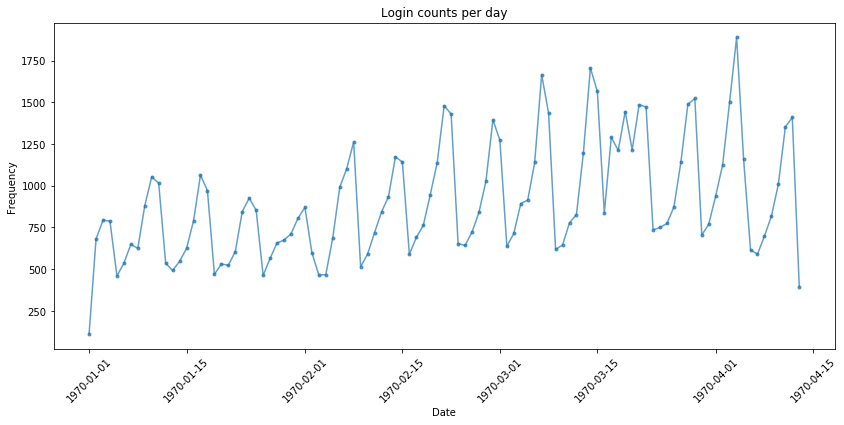

In [13]:
plt.figure(figsize=(14,6))
plt.plot(counts_per_day,alpha=0.7,marker='.')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Login counts per day')

Two main things stick out from the plot above: 
- There is a **general upward trend till March 15**, followed by a **downward trend till April 15**.
- There is a **peak in login counts every 7 days**. Upon doing a manual search, Jan 1 1970 turns out to be a Thursday. So the first **peak occurs on a Saturday followed by a slight downturn on Sunday** before taking a big dip on Monday. The trend gradually increases every week where every successive Saturday and Sunday records a higher login count than the previous week. 
- **Mondays and sometimes Tuesdays** see the **lowest login counts**. 

### b. Exploring logins per 7 days

In [14]:
#Resampling datetime data by 7 day intervals
counts_per_day_7 = df_logins.resample('7D').count()
print ("Number of days in the dataset: ",counts_per_day_7.shape[0])

Number of days in the dataset:  15


In [15]:
counts_per_day_7.head(20)

1970-01-01    4017
1970-01-08    5149
1970-01-15    4971
1970-01-22    4912
1970-01-29    4590
1970-02-05    5865
1970-02-12    6133
1970-02-19    7011
1970-02-26    6781
1970-03-05    7195
1970-03-12    8636
1970-03-19    7875
1970-03-26    7439
1970-04-02    7585
1970-04-09    4983
Freq: 7D, dtype: int64

Text(0.5, 1.0, 'Login counts per 7 days')

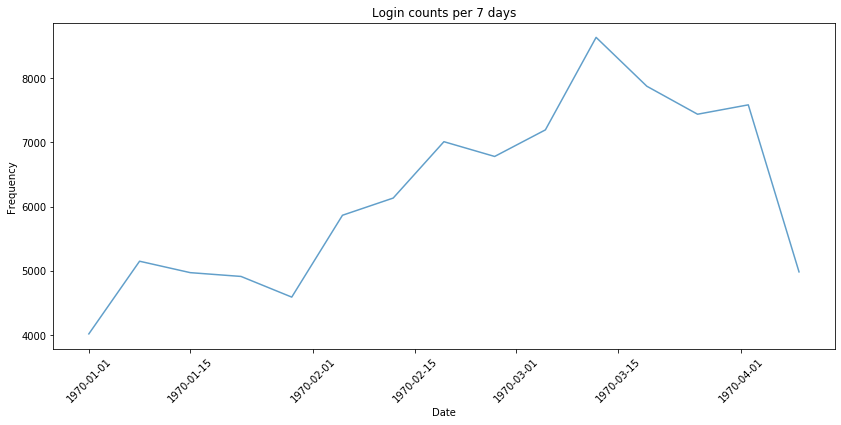

In [16]:
plt.figure(figsize=(14,6))
plt.plot(counts_per_day_7,alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Login counts per 7 days')

The above plot more clearly shows the upward trend till around mid-March, followed by a downward trend. 

### c. Exploring logins per 15 days

In [17]:
#Resampling datetime data by 15 day intervals
counts_per_day_15 = df_logins.resample('15D').count()
print ("Number of 15 day intervals in the dataset: ",counts_per_day_15.shape[0])

Number of 15 day intervals in the dataset:  7


In [18]:
counts_per_day_15.head(20)

1970-01-01     9790
1970-01-16    10644
1970-01-31    12020
1970-02-15    14731
1970-03-02    15573
1970-03-17    16877
1970-04-01    13507
Freq: 15D, dtype: int64

Text(0.5, 1.0, 'Login counts per 15 days')

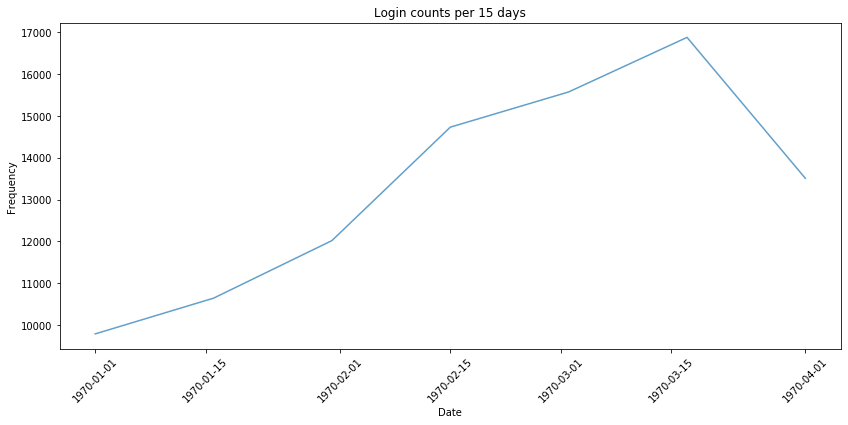

In [19]:
plt.figure(figsize=(14,6))
plt.plot(counts_per_day_15,alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Login counts per 15 days')

The 15 day interval plot displays the most general view of the data where there is an upward trend till March 15 followed by a downward trend after that.  

### d. Exploring logins per 15 minutes

In [20]:
#Resampling datetime data by 15min intervals
counts_per_min_15 = df_logins.resample('15Min').count()
print ("Number of 15 minute intervals in the dataset: ",counts_per_min_15.shape[0])

Number of 15 minute intervals in the dataset:  9788


In [21]:
counts_per_min_15.head()

1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, dtype: int64

In [22]:
counts_per_min_15.sort_values(ascending=False).head(20)

1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-01 23:30:00    60
1970-04-04 05:00:00    60
1970-04-04 05:15:00    59
1970-04-04 04:45:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
1970-04-04 01:00:00    54
1970-03-17 01:30:00    53
1970-04-04 00:30:00    53
1970-03-29 04:45:00    52
1970-03-08 04:45:00    51
1970-04-03 22:45:00    50
1970-03-29 02:15:00    50
1970-04-04 00:45:00    50
1970-02-15 04:45:00    50
1970-03-28 04:30:00    50
dtype: int64

In [23]:
counts_per_min_15.sort_values().head()

1970-01-27 07:00:00    0
1970-02-11 06:45:00    0
1970-01-30 05:45:00    0
1970-01-30 06:30:00    0
1970-04-08 08:45:00    0
dtype: int64

Text(0.5, 1.0, 'Login counts per 15 minutes')

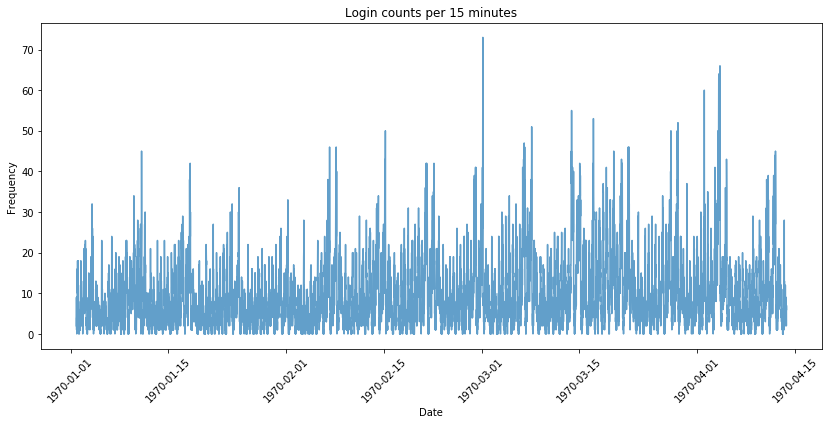

In [24]:
plt.figure(figsize=(14,6))
plt.plot(counts_per_min_15,alpha=0.7)
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Login counts per 15 minutes')

The 15min interval data above seems to indicate a slightly shifted overall trend than the plots above. These are the key points: 
- A general upward trend till around Apr 1 followed by a downward trend. 
- The highest recorded login count occurs on March 1 at 4:30am with a count of 73. Looking at the overall data, this point could be an anomaly. 
- The next highest peak occurs on April 4 at 5:30am with 66 counts. 
- From the sorted table earlier, it appears that the highest login counts tend to occur between 10pm and 5am. 
- There are some 15min intervals where there is no login activity whatsoever. 

# 5. Experiment and Metrics Design

### Question

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Answers

1. Key metrics of success: 

With the toll enforced, there should be little to no crossing of vehicles from Gotham to Metropolis and vice versa. With no toll fees, there should be a significant increase in this trend. One way to measure this would be to record the number of times vehicles cross over from one side to the other in a database. This can be recorded as **number of crossings per hour**. 

This can be done using sensors on the vehicles, similar to tolling systems in some other US cities such as Atlanta and Boston. So the key metric here would be the number of crossings from one side to another on weekends. 

We know that due to the circadian nature of activities during weekdays, there wouldn't be a need to cross over, where simply sticking to one city makes sense. However, the weekends would be more telling as we expect similar activity in both cities. 

2. Experimental design

In order to design a practical experiment, we would need two conditions. One where we had the default scenario of toll fees being enforced, we can call this the **control group**. The second condition can be the scenario where the toll fees are removed, calling this the **experimental group**.

As mentioned earlier, the key metric could be the number of crossings from one side to another during the weekends. This metric could be measured in several ways. 
- The data could be gathered from one weekend to the next.
- The data could be across multiple weekends where 10 consecutive weekends had toll fees while the next 10 weekends had no toll fees. However, time would be a **confounding variable** in this case. For example, during a festive period such as Thanksgiving, there could be higher crossings than usual anyways making our experiment not as effective. 
- In order to block the time variable to an extent, tolls could be enforced on Saturday and removed on Sunday. Another option would be to enforce tolls during half the day and remove it for the rest. In any of these cases, time would play some role but it's effect can be minimized. 
- The only way time would be eliminated as a factor is if there were two similar bridge crossings. In that case, one would have the toll fees and the other wouldn't. 

Proposal: The experiment I would choose is to collect the no toll fees data across 4 consecutive weekends (control group). This would minimize the effect of the time variable to an extent. Once the toll fees are removed, we should give it a couple of weeks for the news to sink in and the traffic to become steady across the bridge, then collect the no toll fees data over the next 4 weekends. 

To test whether there is a significant increase in traffic from one city to another, we can conduct a hypothesis test comparing the means from the control and experimental group. If there is a statistically significant increase in mean for the experimental group, we have would know that the change in policy worked. The dataset would contain hourly crossings during weekends across 4 weeks. For the hypothesis testing, we can compare the means of the hourly data. 

Hypothesis test:
- ***Null (ho)***: mean_control = mean_experiment. No difference in mean between control and experimental group.
- ***Alternate (ha)***: mean_experiment > mean_control. Significant increase in experimental group compared to control group.  

# 6. Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

### Data description
- *city*: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYY MM DD’
- *last_trip_date*: the last time this user completed a trip; in the form ‘YYYY MM DD’
- *avg_dist*: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- *avg_rating_of_driver*: the rider’s average rating of their drivers over all of their trips
- *surge_pct*: the percent of trips taken with surge multiplier > 1
- *avg_surge*: The average surge multiplier over all of this user’s trips
- *trips_in_first_30_days*: the number of trips this user took in the first 30 days after
signing up
- *ultimate_black_user*: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- *weekday_pct*: the percent of the user’s trips occurring during a weekday

In [25]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [26]:
df.shape

(50000, 12)

In [27]:
df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

## 6.1 Exploring *sign_up* date and last_trip_date

In [0]:
df_dates = df.copy()

In [0]:
df_dates['signup_date'] = df_dates['signup_date'].apply(lambda x: pd.to_datetime(x))
df_dates['last_trip_date'] = df_dates['last_trip_date'].apply(lambda x: pd.to_datetime(x))

In [30]:
df_dates.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


(array([735234., 735238., 735242., 735246., 735250., 735254., 735258.,
        735262., 735265.]), <a list of 9 Text xticklabel objects>)

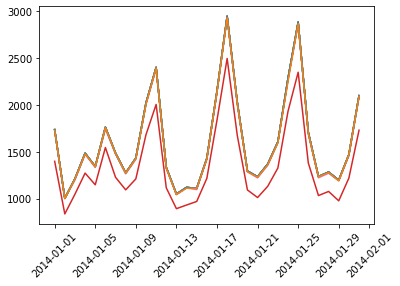

In [31]:
df_dates.index = df_dates['signup_date']
plt.plot(df_dates.resample('D').count())
plt.xticks(rotation=45)

In [32]:
df_dates['signup_date'][0]

Timestamp('2014-01-25 00:00:00')

In [33]:
df_dates.resample('D').count()['city']

signup_date
2014-01-01    1737
2014-01-02    1004
2014-01-03    1213
2014-01-04    1485
2014-01-05    1343
2014-01-06    1763
2014-01-07    1486
2014-01-08    1275
2014-01-09    1433
2014-01-10    2021
2014-01-11    2402
2014-01-12    1334
2014-01-13    1049
2014-01-14    1120
2014-01-15    1110
2014-01-16    1431
2014-01-17    2149
2014-01-18    2948
2014-01-19    2028
2014-01-20    1295
2014-01-21    1234
2014-01-22    1369
2014-01-23    1606
2014-01-24    2284
2014-01-25    2885
2014-01-26    1708
2014-01-27    1236
2014-01-28    1284
2014-01-29    1197
2014-01-30    1471
2014-01-31    2100
Freq: D, Name: city, dtype: int64

Looking at the trend above, there is a peak on Jan 1 which is new year's day. After that, there are peaks every Saturday starting from Jan 11 (Sat). 

(array([735234., 735265., 735293., 735324., 735354., 735385., 735415.]),
 <a list of 7 Text xticklabel objects>)

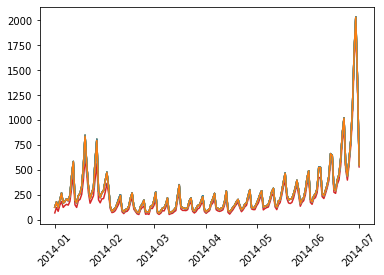

In [34]:
df_dates.index = df_dates['last_trip_date']
plt.plot(df_dates.resample('D').count())
plt.xticks(rotation=45)

In [35]:
df_dates.resample('D').count()['city']

last_trip_date
2014-01-01     128
2014-01-02     180
2014-01-03     128
2014-01-04     199
2014-01-05     270
              ... 
2014-06-27    1120
2014-06-28    1679
2014-06-29    2036
2014-06-30    1408
2014-07-01     548
Freq: D, Name: city, Length: 182, dtype: int64

For the last trip date, there is a slight surge in activity in January itself which corresponds to the sign up trends as well. This would indicate that a lot of people signed up for simply a one-time use. 

After Jan, the trend is pretty steady until June where there is a growing trend once again. Since this data is collected until July, it makese sense that there is a spike in last trip dates in June as most people used the service last during the last month. 

# 6.2 Determining retention values

In order to determine which users were retained, we need to figure out if a user completed a trip in the last 30 days or not, hence last 30 days prior to July 1 which is the last date in the dataset when a trip was completed. 

In [36]:
#Creating a datetime object for July 1
last_date = pd.to_datetime('2014-07-01')
last_date

Timestamp('2014-07-01 00:00:00')

In [37]:
#Creating a new variable which contains the number of days since last trip
df_dates['days_since_last_trip'] = df_dates['last_trip_date'].apply(lambda x: (last_date - x).days)
df_dates['days_since_last_trip']

last_trip_date
2014-06-17     14
2014-05-05     57
2014-01-07    175
2014-06-29      2
2014-03-15    108
             ... 
2014-06-05     26
2014-01-25    157
2014-05-22     40
2014-01-15    167
2014-04-20     72
Name: days_since_last_trip, Length: 50000, dtype: int64

Above, we have extracted the number of days since the last trip and included it as a new variable in the dataset. This was done by first calculating the time delta between the last date and the last ride date and then extracting the 'days' attribute. 

In [38]:
#Converting the indexes back to integers
df_dates.index = range(df_dates.shape[0])
df_dates.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108


In [39]:
#Creating new variable which states whether the user is active or not (any trips within last 30 days)
df_dates['active'] = list(map(int, df_dates['days_since_last_trip'] < 30))
df_dates.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,0


Above, we have created a new variable which states whether the user is active or not based on activity in the last 30 days. 

In [40]:
df_active = df_dates[['city','active']].groupby('active').count()
df_active.columns = ['users']
df_active['percent'] = df_active['users'].apply(lambda x: (x/df_active['users'].sum())*100)
df_active

,users,percent
active,,
0,31690,63.38
1,18310,36.62


Above, we can see that the number of users that are currently active are **18,310**, which is almost half the number of inactive users - **31,690**. We have **63.38%** inactive users in comparison to **36.62%** active or retained users. This data is visualized below.  

Text(0, 0.5, 'users')

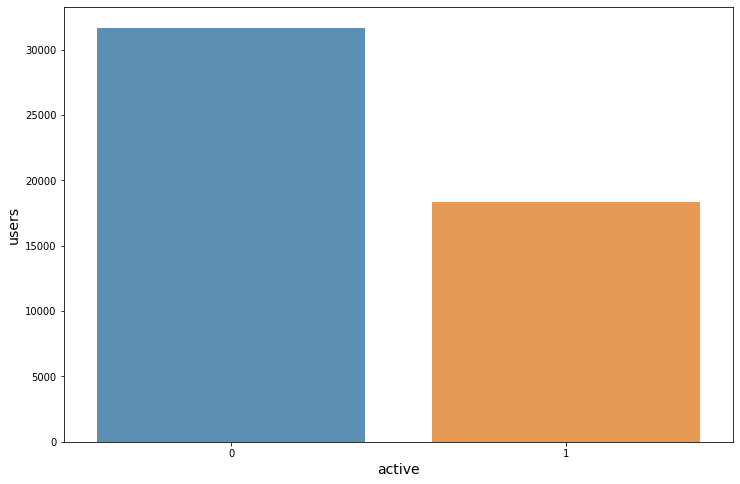

In [41]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_active,y='users',x=df_active.index,alpha=0.8)
plt.xlabel('active',size=14)
plt.ylabel('users',size=14)

# 6.3 More exploratory data analysis

In [42]:
df_dates.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,0


### 6.3.1 active vs trips_in_first_30_days

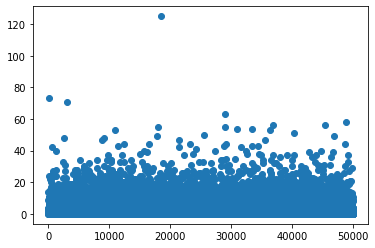

In [43]:
plt.scatter(range(len(df_dates['trips_in_first_30_days'])),df_dates['trips_in_first_30_days'])

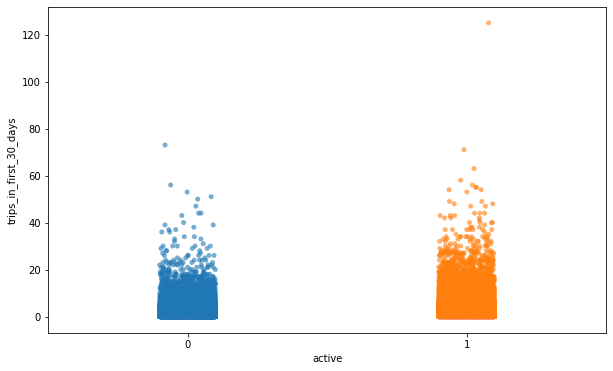

In [44]:
plt.figure(figsize=(10,6))
sns.stripplot(x='active',y='trips_in_first_30_days',data=df_dates,alpha=0.6)

Looking at the plot above, there is some indication that the current active users had greater number of trips within the first 30 days of signing up. The average value for active users is clearly higher as shown in the table below. One thing to notice is that we have an outlier for the active cases with a value above 120. We can get rid of this point and plot again. 

In [45]:
df_dates[['trips_in_first_30_days','active']].groupby('active').mean()

,trips_in_first_30_days
active,
0,1.659167
1,3.349590


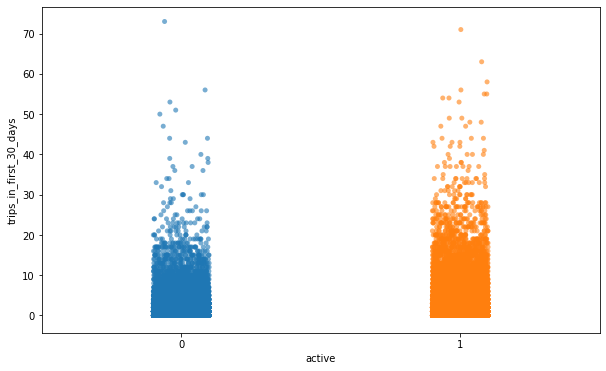

In [46]:
df_dates = df_dates[df_dates['trips_in_first_30_days']<100]
plt.figure(figsize=(10,6))
sns.stripplot(x='active',y='trips_in_first_30_days',data=df_dates,alpha=0.6)

The higher number of trips during the first 30 days for active users could indicate that a lot of the inactive users may have signed up for the service initially for limited number of uses which may be reflected during their activity for January. We can't say that this variable clearly explains the difference between active and non-active users. Hence, let's look at some other variables first. 

### 6.3.2 active vs ultimate_black_user

In [47]:
df_dates['ultimate_black_user'].value_counts()

False    31146
True     18853
Name: ultimate_black_user, dtype: int64

Overall, far more people did not use the ultimate black service during the first 30 days. 

,active
ultimate_black_user,
False,31146
True,18853


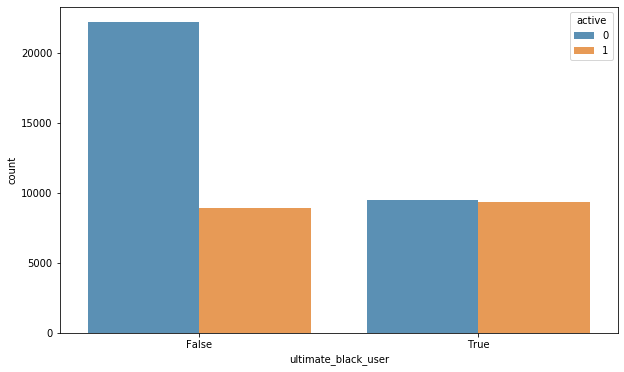

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(x='ultimate_black_user',hue='active',data=df_dates,alpha=0.8)

df_dates[['ultimate_black_user','active']].groupby('ultimate_black_user').count()

Looking at the data above, both active and inactive users had equal ultimate black usage. However, when we consider the higher percentage of inactive users, it tells us that the active users in fact had a higher rate of ultimate black usage during the first 30 days. Therefore, we could use this variable for our prediction. 

### 6.3.3 active vs weekday_pct

,weekday_pct
active,
0,60.181597
1,62.214070


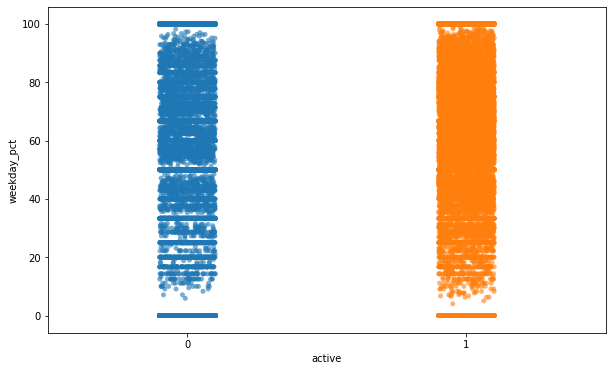

In [49]:
plt.figure(figsize=(10,6))
sns.stripplot(x='active',y='weekday_pct',data=df_dates,alpha=0.6)

df_dates[['weekday_pct','active']].groupby('active').mean()

The weekday usage is essentially the same for both active and inactive users. Therefore, this variable may not be the suitable for predecting retention.

### 6.3.4 active vs avg_surge

Theoretically, the average surge multiplier should be higher for active users since they have had the service for a longer time. Unless, the active user was inactive for several months before just using it in June. 

,avg_surge
active,
0,1.075367
1,1.073718


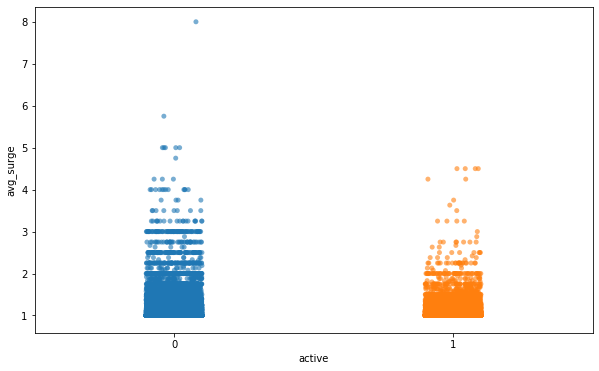

In [50]:
plt.figure(figsize=(10,6))
sns.stripplot(x='active',y='avg_surge',data=df_dates,alpha=0.6)

df_dates[['avg_surge','active']].groupby('active').mean()

### 6.3.5 active vs surge_pct

Theoretically, the average surge multiplier should be higher for active users since they have had the service for a longer time. Unless, the active user was inactive for several months before just using it in June. 

,surge_pct
active,
0,8.688548
1,9.127877


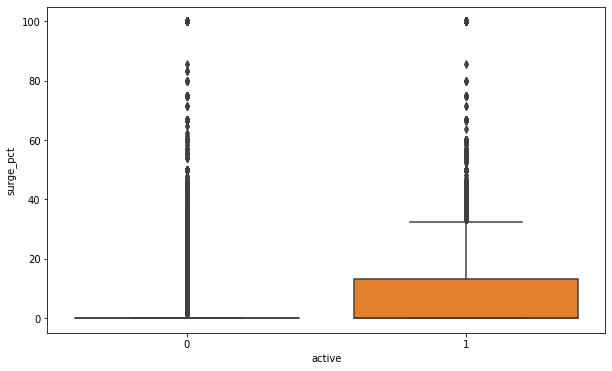

In [51]:
plt.figure(figsize=(10,6))
sns.boxplot(x='active',y='surge_pct',data=df_dates)

df_dates[['surge_pct','active']].groupby('active').mean()

### 6.3.6 active vs avg_rating_of_driver

Theoretically, the average surge multiplier should be higher for active users since they have had the service for a longer time. Unless, the active user was inactive for several months before just using it in June. 

,avg_rating_of_driver
active,
0,4.607018
1,4.593340


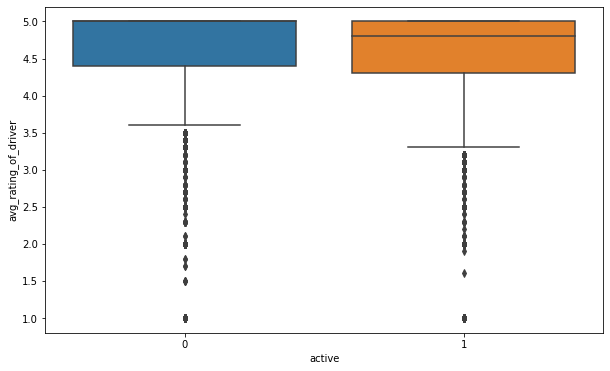

In [52]:
plt.figure(figsize=(10,6))
sns.boxplot(x='active',y='avg_rating_of_driver',data=df_dates)

df_dates[['avg_rating_of_driver','active']].groupby('active').mean()

### 6.3.7 active vs avg_rating_by_driver

Theoretically, the average surge multiplier should be higher for active users since they have had the service for a longer time. Unless, the active user was inactive for several months before just using it in June. 

,avg_rating_by_driver
active,
0,4.786876
1,4.763119


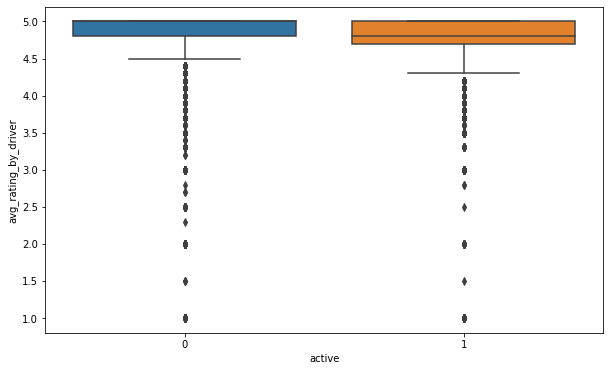

In [53]:
plt.figure(figsize=(10,6))
sns.boxplot(x='active',y='avg_rating_by_driver',data=df_dates)

df_dates[['avg_rating_by_driver','active']].groupby('active').mean()

### 6.3.8 active vs avg_distance

Theoretically, the average surge multiplier should be higher for active users since they have had the service for a longer time. Unless, the active user was inactive for several months before just using it in June. 

,avg_dist
active,
0,6.188478
1,5.119146


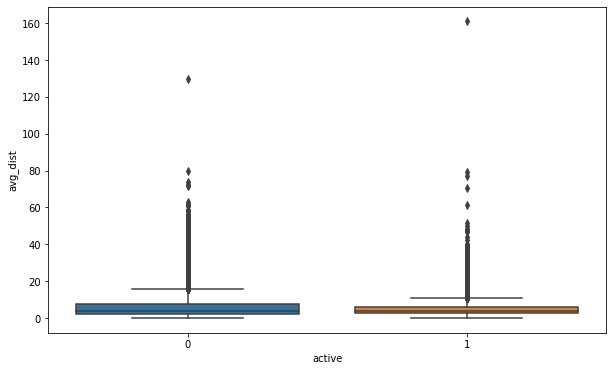

In [54]:
plt.figure(figsize=(10,6))
sns.boxplot(x='active',y='avg_dist',data=df_dates)

df_dates[['avg_dist','active']].groupby('active').mean()

The average distance is clearly higher for inactive users. Let's get rid of the outliers and plot again. 

,avg_dist
active,
0,6.184574
1,5.110634


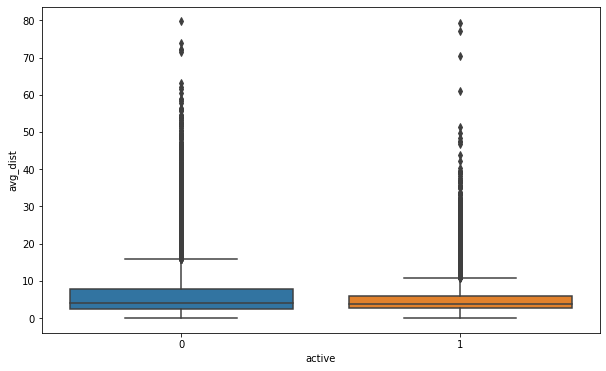

In [55]:
df_dates = df_dates[df_dates['avg_dist']<100]

plt.figure(figsize=(10,6))
sns.boxplot(x='active',y='avg_dist',data=df_dates)

df_dates[['avg_dist','active']].groupby('active').mean()

### 6.3.9 active vs ultimate_black_user

In [56]:
df_dates['phone'].value_counts()

iPhone     34581
Android    15021
Name: phone, dtype: int64

Overall, far more people did not use the ultimate black service during the first 30 days. 

,active
phone,
Android,15021
iPhone,34581


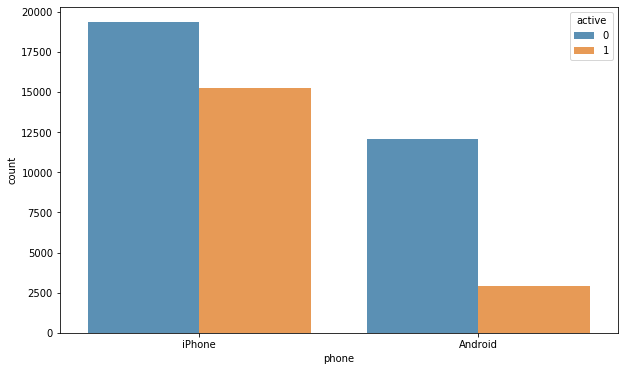

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x='phone',hue='active',data=df_dates,alpha=0.8)

df_dates[['phone','active']].groupby('phone').count()

In [58]:
df_active = df_dates[df_dates['active']==1]
df_active_android = df_active[['phone','active']].groupby('phone').count()
df_active_android['active'] = df_active_android['active'].apply(lambda x: (x/df_active_android['active'].sum())*100) 
df_active_android

,active
phone,
Android,16.178898
iPhone,83.821102


In [59]:
df_active = df_dates[df_dates['active']==0]
df_active_android = df_active[['phone','active']].groupby('phone').count()
df_active_android['active'] = df_active_android['active'].apply(lambda x: (x/df_active_android['active'].sum())*100) 
df_active_android.columns = ['inactive']
df_active_android

,inactive
phone,
Android,38.441955
iPhone,61.558045


There are more than double the amount of iphone users in general. However, the percentage of android users that are active appear to be significantly less than that of iphone users as seen from the tables above. 

### 6.3.10 active vs city

In [60]:
df_dates['city'].value_counts()

Winterfell        23336
Astapor           16533
King's Landing    10128
Name: city, dtype: int64

Overall, far more people did not use the ultimate black service during the first 30 days. 

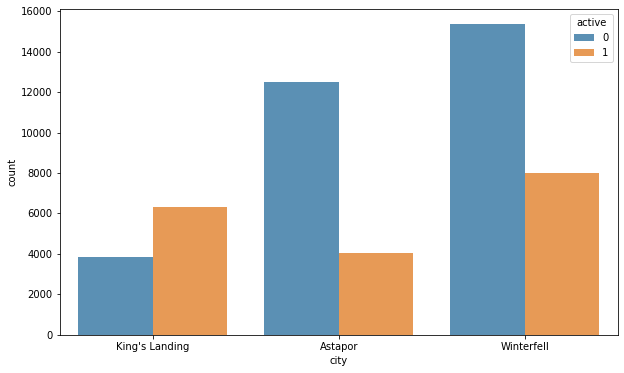

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(x='city',hue='active',data=df_dates,alpha=0.8)

Interestingly, King's Landing has lowest inactive users but the number of active users is still higher. 

In contrast, Astapor has a much higher percentage of inactive users. The case is the same for Winterfell. 

A more accurate representation of this data would be to normalize these values by the population of each city. However, that data is not available currently. For example, Winterfell has the most active and inactive users but that's possibly due to the higher population. 

In [62]:
df_active = df_dates[df_dates['active']==1]
df_active_android = df_active[['city','active']].groupby('city').count()
df_active_android['active'] = df_active_android['active'].apply(lambda x: (x/df_active_android['active'].sum())*100) 
df_active_android

,active
city,
Astapor,21.963076
King's Landing,34.443959
Winterfell,43.592965


In [63]:
df_active = df_dates[df_dates['active']==0]
df_active_android = df_active[['city','active']].groupby('city').count()
df_active_android['active'] = df_active_android['active'].apply(lambda x: (x/df_active_android['active'].sum())*100) 
df_active_android.columns = ['inactive']
df_active_android

,inactive
city,
Astapor,39.483733
King's Landing,12.060968
Winterfell,48.455300


There are more than double the amount of iphone users in general. However, the percentage of android users that are active appear to be significantly less than that of iphone users as seen from the tables above. 

# 6.4 Important variables

Variables to be used in the model:
- city
- phone
- avg_dist
- ultimate_black_user
- trips_in_first_30_days

# 6.5 Modeling - Logistic Regression

### 6.5.1 Feature selection and engineering

In [88]:
df_model = df_dates[['city','phone','avg_dist','ultimate_black_user','trips_in_first_30_days','active']]
df_model.head()

,city,phone,avg_dist,ultimate_black_user,trips_in_first_30_days,active
0,King's Landing,iPhone,3.67,True,4,1
1,Astapor,Android,8.26,False,0,0
2,Astapor,iPhone,0.77,False,3,0
3,King's Landing,iPhone,2.36,True,9,1
4,Winterfell,Android,3.13,False,14,0


We have selected the 5 variables we think could predict the user retention. 

In [89]:
df_model['ultimate_black_user'] = df_model['ultimate_black_user'].map(int)
df_model.head()

,city,phone,avg_dist,ultimate_black_user,trips_in_first_30_days,active
0,King's Landing,iPhone,3.67,1,4,1
1,Astapor,Android,8.26,0,0,0
2,Astapor,iPhone,0.77,0,3,0
3,King's Landing,iPhone,2.36,1,9,1
4,Winterfell,Android,3.13,0,14,0


In [91]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49602 entries, 0 to 49999
Data columns (total 6 columns):
city                      49602 non-null object
phone                     49602 non-null object
avg_dist                  49602 non-null float64
ultimate_black_user       49602 non-null int64
trips_in_first_30_days    49602 non-null int64
active                    49602 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.6+ MB


In [90]:
df_model = df_model.dropna()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49602 entries, 0 to 49999
Data columns (total 6 columns):
city                      49602 non-null object
phone                     49602 non-null object
avg_dist                  49602 non-null float64
ultimate_black_user       49602 non-null int64
trips_in_first_30_days    49602 non-null int64
active                    49602 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 2.6+ MB


Above, we got rid of the missing values from the dataset. 

### 6.5.2 Label encoding

Here we conduct label encoding to convert categorical variables to integers. 

In [0]:
df_model['city'] = LabelEncoder().fit_transform(df_model['city'])
df_model['phone'] = LabelEncoder().fit_transform(df_model['phone'])

In [96]:
df_model.head()

,city,phone,avg_dist,ultimate_black_user,trips_in_first_30_days,active
0,1,1,3.67,1,4,1
1,0,0,8.26,0,0,0
2,0,1,0.77,0,3,0
3,1,1,2.36,1,9,1
4,2,0,3.13,0,14,0


### 6.5.3 Train test split

In [97]:
x = df_model.drop('active',axis=1)
y = df_model['active']
print (x.shape)
print (y.shape)

(49602, 5)
(49602,)


In [98]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(34721, 5)
(14881, 5)
(34721,)
(14881,)


### 6.5.4 Scaling

In [99]:
scaler = MinMaxScaler(feature_range = (0,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

"\ndf_model['city'] = MinMaxScaler().fit_transform(df_model['city'])\ndf_model['phone'] = MinMaxScaler().fit_transform(df_model['phone'])\ndf_model['avg_dist'] = MinMaxScaler().fit_transform(df_model['avg_dist'])\ndf_model['ultimate_black_user'] = MinMaxScaler().fit_transform(df_model['ultimate_black_user'])\ndf_model['trips_in_first_30_days'] = MinMaxScaler().fit_transform(df_model['trips_in_first_30_days'])\n\ndf_model.head()\n"

In [102]:
x_train_scaled

array([[1.        , 0.        , 0.26590538, 0.        , 0.01369863],
       [0.        , 0.        , 0.12736855, 0.        , 0.        ],
       [1.        , 0.        , 0.22524784, 0.        , 0.01369863],
       ...,
       [0.        , 1.        , 0.01568578, 0.        , 0.01369863],
       [0.        , 0.        , 0.07265654, 0.        , 0.01369863],
       [0.        , 1.        , 0.05320617, 0.        , 0.05479452]])

### 6.5.5 Baseline model, prediction and evaluation

Below, we create our baseline logistic regression model and make our initial prediction. 

In [0]:
lr = LogisticRegression(random_state=0)
model = lr.fit(x_train_scaled,y_train)

In [0]:
prediction = model.predict(x_test_scaled)

In [137]:
acc = accuracy_score(y_test,prediction)
print ('Accuracy: ',acc)

Accuracy:  0.7001545595054096


Combined ROC AUC=0.637
Positive class ROC AUC=0.715
Negative class ROC AUC=0.285


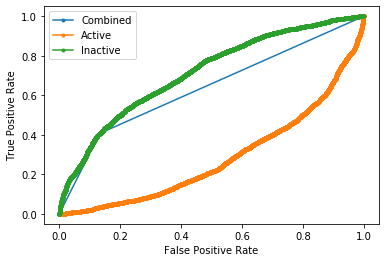

In [138]:
lr_probs = model.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
lr_probs_pos = lr_probs[:,1]
lr_probs_neg = lr_probs[:,0]

# calculate scores
lr_auc = roc_auc_score(y_test, prediction)
lr_auc_pos = roc_auc_score(y_test, lr_probs_pos)
lr_auc_neg = roc_auc_score(y_test, lr_probs_neg)

# summarize scores
print('Combined ROC AUC=%.3f' % (lr_auc))
print('Positive class ROC AUC=%.3f' % (lr_auc_pos))
print('Negative class ROC AUC=%.3f' % (lr_auc_neg))

lr_fpr, lr_tpr, thresh = roc_curve(y_test, prediction)
lr_fpr_neg, lr_tpr_neg, thresh = roc_curve(y_test, lr_probs[:,0])
lr_fpr_pos, lr_tpr_pos, thresh = roc_curve(y_test, lr_probs_pos)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Combined')
plt.plot(lr_fpr_neg, lr_tpr_neg, marker='.', label='Active')
plt.plot(lr_fpr_pos, lr_tpr_pos, marker='.', label='Inactive')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

A ROC AUC score of 0.715 is decent. With an accuracy score of 0.7, we can see that there is no class imbalance issue with the dataset. However, we may still be able to improve these scores further by optimizing the model. 

In [139]:
print (classification_report(y_test,prediction,target_names=['Inactive','Active']))
tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()
print ("True negatives: ",tn)
print ('False positives: ',fp)
print ('False negatives: ',fn)
print ('True positives: ',tp)

              precision    recall  f1-score   support

    Inactive       0.72      0.87      0.79      9481
      Active       0.64      0.41      0.50      5400

    accuracy                           0.70     14881
   macro avg       0.68      0.64      0.64     14881
weighted avg       0.69      0.70      0.68     14881

True negatives:  8218
False positives:  1263
False negatives:  3199
True positives:  2201


We can see that there are a large number of true negative values. This means that the model predicts inactive users pretty well. However, it does not predict active users that well with a low true positive value. It predicts less than 50% of the active users correctly. 

### 6.5.6 Model optimization - grid search and cross validation

Here we optimize the model by sweeping hyperparameters of the logistic regression model and using a 5-fold cross validation. The optimization is going to be evalauted using the ROC AUC metric in order to determine the best combination of parameters. We pick ROC AUC as this is the best metric to evaluate binary classifiction models. 

In [140]:
params = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','newton-cg', 'lbfgs', 'sag', 'saga']}

clf = GridSearchCV(lr, param_grid = params, cv = 5, verbose=True, n_jobs=-1,scoring='roc_auc')
best_clf = clf.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   50.4s finished


In [141]:
print (clf.best_estimator_)
print (clf.best_score_)
print (clf.best_params_)
#clf.cv_results_

LogisticRegression(C=10000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.722260340554348
{'C': 10000.0, 'penalty': 'l2', 'solver': 'lbfgs'}


The best parameters following the grid search algorithm is shown above. 

0.6999529601505275
0.6999529601505275
0.6999529601505275
0.6999529601505275
Combined ROC AUC=0.637
Positive class ROC AUC=0.715
Negative class ROC AUC=0.285


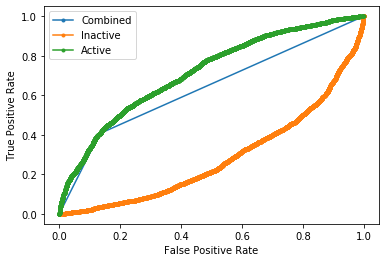

In [142]:
lr = LogisticRegression(C=10000,penalty='l2',solver='lbfgs',random_state=0)
model = lr.fit(x_train_scaled,y_train)
prediction = model.predict(x_test_scaled)

acc = accuracy_score(y_test,prediction)
print (acc)
prc = precision_score(y_test,prediction,average='micro')
print (prc)
rec = recall_score(y_test,prediction,average='micro')
print (rec)
f1 = f1_score(y_test,prediction,average='micro')
print (f1)

lr_probs = model.predict_proba(x_test_scaled)
# keep probabilities for the positive outcome only
lr_probs_pos = lr_probs[:,1]
lr_probs_neg = lr_probs[:,0]

# calculate scores
lr_auc = roc_auc_score(y_test, prediction)
lr_auc_pos = roc_auc_score(y_test, lr_probs_pos)
lr_auc_neg = roc_auc_score(y_test, lr_probs_neg)

# summarize scores
print('Combined ROC AUC=%.3f' % (lr_auc))
print('Positive class ROC AUC=%.3f' % (lr_auc_pos))
print('Negative class ROC AUC=%.3f' % (lr_auc_neg))

lr_fpr, lr_tpr, thresh = roc_curve(y_test, prediction)
lr_fpr_neg, lr_tpr_neg, thresh = roc_curve(y_test, lr_probs[:,0])
lr_fpr_pos, lr_tpr_pos, thresh = roc_curve(y_test, lr_probs_pos)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Combined')
plt.plot(lr_fpr_neg, lr_tpr_neg, marker='.', label='Inactive')
plt.plot(lr_fpr_pos, lr_tpr_pos, marker='.', label='Active')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

After we applied the newly derived hyperparameters to the logistic regression model, we see little improvement as the ROC AUC score is still 0.715. 

In [0]:
confusion = {'tn':[],'fp':[],'fn':[],'tp':[]}
auc = [] 
acc = []
pre = []
rec = [] 
threshold = []
ticks = ['0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9','1']
for i in np.arange(0,1,0.01):
    threshold.append(i)
    # predict probabilities
    lr_probs = model.predict_proba(x_test_scaled)
    predictions = (lr_probs[:,1]>i).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
    confusion['tn'].append(tn)
    confusion['fp'].append(fp)
    confusion['fn'].append(fn)
    confusion['tp'].append(tp)
    acc.append(accuracy_score(y_test,predictions))
    auc.append(roc_auc_score(y_test,predictions))
    #pre.append(precision_score(y_test,predictions))
    rec.append(recall_score(y_test,predictions))

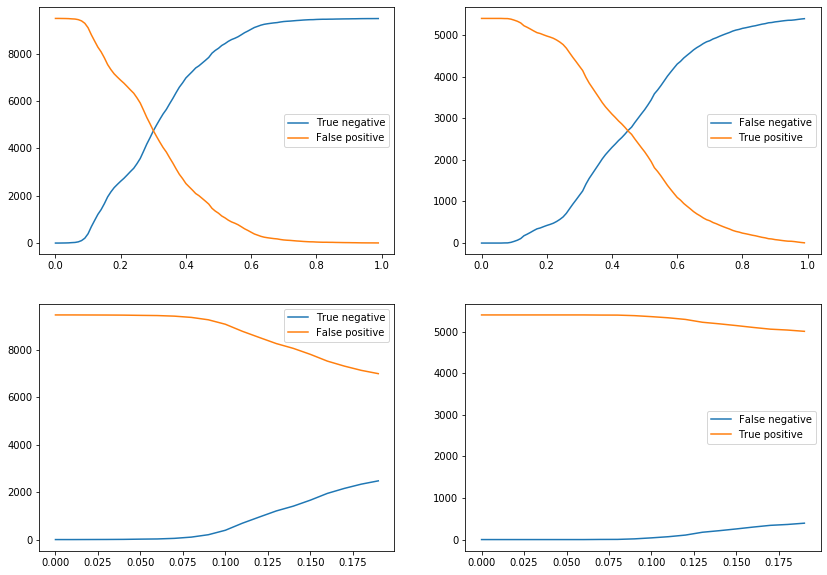

In [144]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(threshold,confusion['tn'],label='True negative')
plt.plot(threshold,confusion['fp'],label='False positive')
plt.legend()
plt.subplot(2,2,2)
plt.plot(threshold,confusion['fn'],label='False negative')
plt.plot(threshold,confusion['tp'],label='True positive')
plt.legend()
plt.subplot(2,2,3)
plt.plot(threshold[:20],confusion['tn'][:20],label='True negative')
plt.plot(threshold[:20],confusion['fp'][:20],label='False positive')
plt.legend()
plt.subplot(2,2,4)
plt.plot(threshold[:20],confusion['fn'][:20],label='False negative')
plt.plot(threshold[:20],confusion['tp'][:20],label='True positive')
plt.legend()
plt.show()

In [145]:
print (classification_report(y_test,prediction,target_names=['Inactive','Active']))
tn, fp, fn, tp = confusion_matrix(y_test,prediction).ravel()
print (tn, fp, fn, tp)

              precision    recall  f1-score   support

    Inactive       0.72      0.87      0.79      9481
      Active       0.64      0.41      0.50      5400

    accuracy                           0.70     14881
   macro avg       0.68      0.64      0.64     14881
weighted avg       0.69      0.70      0.68     14881

8221 1260 3205 2195


# 6.6 Model insights

We used a logistic regression model to predict retention (active and inactive users). Following hyperparameter tuning, a ROC AUC score of 0.715 was achieved. 

As the more important concern is predicting the inactive users accurately, the final model should be good enough. This model yielded 8221 true negative predictions out of a possible 9481 inactive cases which is a high accuracy rate for the inactive cases. In other words, the recall score is 87% for inactive users. 

**Why is it important to predict inactive users?**

- We need to predict the users that were not retained to figure out what their behaviors are like so that the service can be catered more to their needs in an attempt to actually retain them. Therefore, it is important to predict the inactive users. 

- In a lot of cases, simply looking at activity during the first one month of signing up could indicate whether a user is likely to use the service just once or for a longer period of time. For example, as we saw in the EDA section, active users tend to have more trips in the first 30 days. This information can be used to flag possible users that may leave. 

**Why is it important to predict active users?**

- Alternatively, it also important to predict active users to determine what are the characteristics of these users. 
